In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
# Задание:

# 1) Ранжировать данные по величине и найти размах выборки.
# 2) Преобразовать точечный вариационный ряд в интервальный с числом интервалов 8.
# 3) Построить полигон и гистограмму.
# 4) Найти выборочные моду и медиану.
# 5) Найти выборочное среднее, дисперсию и СКО.
# 6) Проверить гипотезу о нормальном распределении генеральной совокупности с помощью "a"
#    критерия Пирсон на уровне значимости.
# 7) Найти доверительный интервал  для математического ожидания генеральной совокупности
#    с надежностью "y".

In [3]:
# DataFrame:

#    |  1   2   3   4   5   6   7   8   9   10
# --------------------------------------------
#  1 | 561 555 569 555 567 559 567 555 566 557
#  2 | 580 568 561 572 563 574 542 562 542 572
#  3 | 564 560 569 543 560 565 568 558 539 550
#  4 | 566 563 562 546 570 582 568 565 561 554
#  5 | 548 558 586 562 559 558 545 563 557 574
#  6 | 550 562 557 566 559 576 560 554 552 541
#  7 | 534 574 560 548 573 562 556 577 554 564
#  8 | 567 546 571 563 557 552 562 550 551 566
#  9 | 576 572 542 569 556 557 555 569 571 575
# 10 | 556 540 557 549 577 562 552 568 554 568
# 11 | 554 531 568 567 545 566 547 571 558 555
# 12 | 550 555 562 550 561 552 571 559 556 558
# 13 | 554 580 571 560 553 549 544 565 557 562
# 14 | 580 546 538 553 541 572 544 556 542 552
# 15 | 571 555 560 564 565 538 552 552 563 577
# 16 | 566 560 544 548 560 549 543 560 552 570
# 17 | 560 549 567 543 542 538 552 549 553 561
# 18 | 566 549 543 561 547 547 587 576 567 563
# 19 | 547 548 556 562 537 554 548 572 569 568
# 20 | 550 558 574 560 545 560 535 546 557 561


In [4]:
# Author:
# Криворотов Павле

# Number of variant [4]

In [5]:
# Number of columns [5, 6, 8]
col1 = "5"
col2 = "6"
col3 = "8"

# Number of alpha coeff [a = 0.2]
a_coeff = 0.2

# Number of gamma coeff [y = 0.9]
y_coeff = 0.9

In [6]:
# Create DataFrame:
df = pd.read_csv("data.txt", sep = " ", usecols = [col1, col2, col3])

df

,5,6,8
0,567,559,555
1,563,574,562
2,560,565,558
3,570,582,565
4,559,558,563
5,559,576,554
6,573,562,577
7,557,552,550
8,556,557,569
9,577,562,568


In [7]:
# 
# 
# Пункт первый: Ранжировать данные по величине и найти размах выборки.
# 
# 

In [8]:
# Определяем минимальное значение для каждого столбца в датафрейме:
min_by_columns = df.min()

min_by_columns

5    537
6    538
8    546
dtype: int64

In [9]:
# Определяем минимальное значение для всего датафрейма:
min_by_dataframe = min_by_columns.min()

min_by_dataframe

537

In [10]:
# Определяем максимальное значение для каждого столбца в датафрейме:
max_by_columns = df.max()

max_by_columns

5    577
6    582
8    577
dtype: int64

In [11]:
# Определяем максимальное значение для всего датафрейма:
max_by_dataframe = max_by_columns.max()

max_by_dataframe

582

In [12]:
# Расчитываем размах выборки:
range_dataframe = max_by_dataframe - min_by_dataframe

range_dataframe

45

In [13]:
#
# 
# Пункт второй: Преобразовать точечный вариационный ряд в интервальный с числом
# интервалов 8.
# 
# 

In [14]:
# Создаём массив значений нашего датафрейма размерность массива [20, 3]:
array_dataframe = np.array(df)

# Перопределяем размер массива на [1, 60]:
array_dataframe = np.reshape(array_dataframe, 60)

# Сортируем одномерный массив с данными в порядке возрастания:
array_dataframe.sort()

array_dataframe

array([537, 538, 538, 541, 542, 545, 545, 546, 547, 547, 549, 549, 549,
       550, 552, 552, 552, 553, 554, 554, 555, 556, 556, 557, 557, 558,
       558, 559, 559, 559, 559, 560, 560, 560, 560, 561, 562, 562, 562,
       563, 563, 565, 565, 565, 565, 566, 567, 568, 569, 570, 571, 572,
       572, 573, 574, 576, 576, 577, 577, 582], dtype=int64)

In [15]:
# Количество интервалов разбиения:
count_intervals = 8

# Определяем приращение для всех интервалов:
delta_range_dataframe = range_dataframe / count_intervals

# Массив датафрейма с разбиением на 8 интервалов
array_intervals_dataframe = np.zeros((count_intervals, 20))

# Массив обработанных данных:
array_info = np.zeros((8), dtype = {"names": ["x0", "x1", "xi", "ni", "hi"],
                                       "formats" : [np.float32, np.float32, np.float32,
                                                    np.int32, np.float32]})

for count in range(1, count_intervals + 1, 1):
    start = min_by_dataframe + delta_range_dataframe * (count - 1)
    stop = min_by_dataframe + delta_range_dataframe * count
    
    ind = 0
    for index in range(len(array_dataframe)):
        if (array_dataframe[index] >= start and array_dataframe[index] < stop):
            array_intervals_dataframe[count - 1][ind] = array_dataframe[index]
            ind += 1

    if (count == count_intervals):
        array_intervals_dataframe[count - 1][ind] = array_dataframe[-1]
        ind += 1

    array_info[count - 1][0] = start
    array_info[count - 1][1] = stop
    array_info[count - 1][2] = (start + stop) / 2
    array_info[count - 1][3] = ind
    array_info[count - 1][4] = delta_range_dataframe
    
    
array_intervals_dataframe

array([[537., 538., 538., 541., 542.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [545., 545., 546., 547., 547.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [549., 549., 549., 550., 552., 552., 552., 553.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [554., 554., 555., 556., 556., 557., 557., 558., 558., 559., 559.,
        559., 559.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [560., 560., 560., 560., 561., 562., 562., 562., 563., 563., 565.,
        565., 565., 565.,   0.,   0.,   0.,   0.,   0.,   0.],
       [566., 567., 568., 569., 570.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [571., 572., 572., 573., 574., 576., 576.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [577., 577., 582.,   0.,   0.,   0

In [16]:
array_info

array([(537.   , 542.625, 539.8125,  5, 5.625),
       (542.625, 548.25 , 545.4375,  5, 5.625),
       (548.25 , 553.875, 551.0625,  8, 5.625),
       (553.875, 559.5  , 556.6875, 13, 5.625),
       (559.5  , 565.125, 562.3125, 14, 5.625),
       (565.125, 570.75 , 567.9375,  5, 5.625),
       (570.75 , 576.375, 573.5625,  7, 5.625),
       (576.375, 582.   , 579.1875,  3, 5.625)],
      dtype=[('x0', '<f4'), ('x1', '<f4'), ('xi', '<f4'), ('ni', '<i4'), ('hi', '<f4')])

In [17]:
df10  = pd.DataFrame(array_intervals_dataframe)

df10 = df10.T.loc[:13]

df10

,0,1,2,3,4,5,6,7
0,537.0,545.0,549.0,554.0,560.0,566.0,571.0,577.0
1,538.0,545.0,549.0,554.0,560.0,567.0,572.0,577.0
2,538.0,546.0,549.0,555.0,560.0,568.0,572.0,582.0
3,541.0,547.0,550.0,556.0,560.0,569.0,573.0,0.0
4,542.0,547.0,552.0,556.0,561.0,570.0,574.0,0.0
5,0.0,0.0,552.0,557.0,562.0,0.0,576.0,0.0
6,0.0,0.0,552.0,557.0,562.0,0.0,576.0,0.0
7,0.0,0.0,553.0,558.0,562.0,0.0,0.0,0.0
8,0.0,0.0,0.0,558.0,563.0,0.0,0.0,0.0
9,0.0,0.0,0.0,559.0,563.0,0.0,0.0,0.0


In [18]:
# Создадим новый датафрейм на основе информации из массива array_info: 
df2 = pd.DataFrame(array_info)

df2

,x0,x1,xi,ni,hi
0,537.000,542.625,539.8125,5,5.625
1,542.625,548.250,545.4375,5,5.625
2,548.250,553.875,551.0625,8,5.625
3,553.875,559.500,556.6875,13,5.625
4,559.500,565.125,562.3125,14,5.625
5,565.125,570.750,567.9375,5,5.625
6,570.750,576.375,573.5625,7,5.625
7,576.375,582.000,579.1875,3,5.625


In [19]:
# Посчитаем количесвто значений в выборке:
df2["ni"].sum()

60

In [20]:
# 
# 
# Пункт третий: Построить полигон и гистограмму.
# 
# 

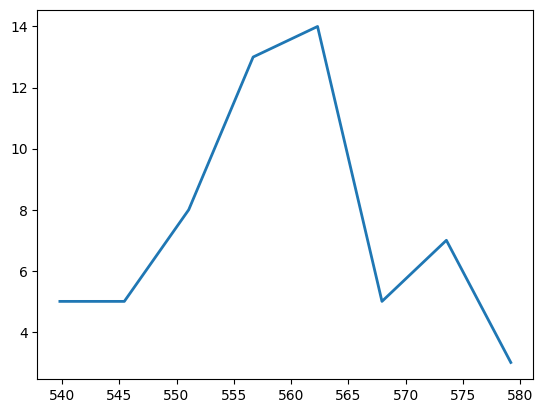

In [21]:
# Строим полигон:
fig, ax = plt.subplots()

ax.plot(df2["xi"], df2["ni"], linewidth=2.0)

plt.show()

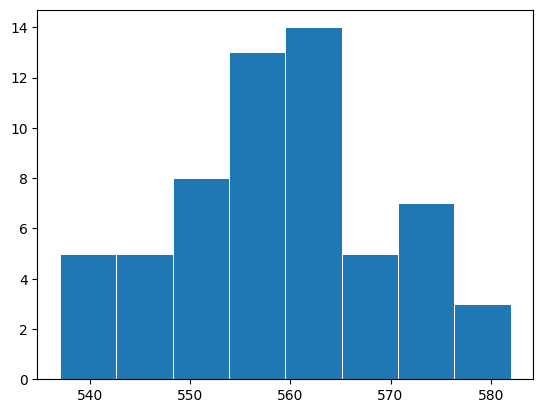

In [22]:
# Строим гистограмму
fig, ax = plt.subplots()

ax.bar(df2["xi"], df2["ni"], width = df2["hi"], edgecolor="white", linewidth=0.7)

plt.show()

In [23]:
# 
# 
# Пункт четвёртый: Найти выборочные моду и медиану.
# 
# 

In [24]:
# Расчитаем "Моду" для столбца "xi":
df2["xi"].mode()

0    539.8125
1    545.4375
2    551.0625
3    556.6875
4    562.3125
5    567.9375
6    573.5625
7    579.1875
Name: xi, dtype: float32

In [25]:
# Расчитаем "Медиану" для столбца "xi":
df2["xi"].median()

559.5

In [26]:
# 
# 
# Пункт пятый: Найти выборочное среднее, дисперсию и СКО.
# 
# 

In [30]:
# Всомним наш преобразованный датафрейм df2:
df2

,x0,x1,xi,ni,hi
0,537.000,542.625,539.8125,5,5.625
1,542.625,548.250,545.4375,5,5.625
2,548.250,553.875,551.0625,8,5.625
3,553.875,559.500,556.6875,13,5.625
4,559.500,565.125,562.3125,14,5.625
5,565.125,570.750,567.9375,5,5.625
6,570.750,576.375,573.5625,7,5.625
7,576.375,582.000,579.1875,3,5.625


In [31]:
# Общее количество исследуемых данных
all_count = df2["ni"].sum()

all_count

60

In [32]:
# Изменим наш датафрейм df2, добавив два столбца: xi*ni и (xi)^2*ni:
df3 = df2
df3 = df3.assign(i1 = lambda x: x["xi"] * x["ni"],
                 i2 = lambda x: x["i1"] * x["xi"])

# Переименовываем столбцы на понятные названия:
df3 = df3.rename(columns = {"i1" : "xi*ni", "i2" : "(xi)^2*ni"})

df3

,x0,x1,xi,ni,hi,xi*ni,(xi)^2*ni
0,537.000,542.625,539.8125,5,5.625,2699.0625,1.456988e+06
1,542.625,548.250,545.4375,5,5.625,2727.1875,1.487510e+06
2,548.250,553.875,551.0625,8,5.625,4408.5000,2.429359e+06
3,553.875,559.500,556.6875,13,5.625,7236.9375,4.028713e+06
4,559.500,565.125,562.3125,14,5.625,7872.3750,4.426735e+06
5,565.125,570.750,567.9375,5,5.625,2839.6875,1.612765e+06
6,570.750,576.375,573.5625,7,5.625,4014.9375,2.302818e+06
7,576.375,582.000,579.1875,3,5.625,1737.5625,1.006374e+06


In [33]:
# Расчитаем "Выборочную среднюю" для столбца "xi*ni":
selective_mean = df3["xi*ni"].sum() / all_count

selective_mean

558.9375

In [34]:
# Расчитаем "Выборочную дисперсию" для столбца (xi)^2*ni:
selective_variance = df3["(xi)^2*ni"].sum() / all_count - selective_mean ** 2

selective_variance

109.8984375

In [35]:
# Расчитаем "Средне-квадратичное отклонение (СКО)" для выборрочной дисперсии:
selective_std = selective_variance ** 0.5

selective_std

10.483245561370772

In [39]:
# 
# 
# Пункт шестой: Проверить гипотезу о нормальном распределении генеральной совокупности
# с помощью "a" критерия Пирсон на уровне значимости.
# 
# 

In [54]:
# Всомним наш преобразованный датафрейм df2:
df2

,x0,x1,xi,ni,hi
0,537.000,542.625,539.8125,5,5.625
1,542.625,548.250,545.4375,5,5.625
2,548.250,553.875,551.0625,8,5.625
3,553.875,559.500,556.6875,13,5.625
4,559.500,565.125,562.3125,14,5.625
5,565.125,570.750,567.9375,5,5.625
6,570.750,576.375,573.5625,7,5.625
7,576.375,582.000,579.1875,3,5.625


In [55]:
# Как можно заметить в строке 7 у столбца "ni" количество значений меньше 5,
# в таком случае объединяем строчки 6 и 7. Тогда получим следующий датафрейм:

df4 = df2.copy()

df4.loc[6, "x1"] = df4["x1"][7]
df4.loc[6, "xi"] = (df4["x0"][6] + df4["x1"][7]) / 2
df4.loc[6, "ni"] = df4["ni"][6] + df4["ni"][7]
df4.loc[6, "hi"] = df4["hi"][6] + df4["hi"][7]

df4 = df4.loc[:6]

# Также следует отметить, что количество интервалов уменьшилось на 1:
count_intervals -= 1

df4

,x0,x1,xi,ni,hi
0,537.000,542.625,539.8125,5,5.625
1,542.625,548.250,545.4375,5,5.625
2,548.250,553.875,551.0625,8,5.625
3,553.875,559.500,556.6875,13,5.625
4,559.500,565.125,562.3125,14,5.625
5,565.125,570.750,567.9375,5,5.625
6,570.750,582.000,576.3750,10,11.250


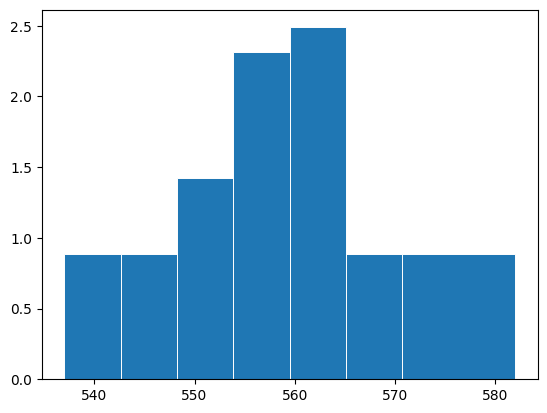

In [56]:
# Строим гистограмму изменённого распределения "xi" и "ni/hi"
fig, ax = plt.subplots()

ax.bar(df4["xi"], df4["ni"] / df4["hi"], width = df4["hi"], edgecolor="white", linewidth=0.7)

plt.show()

In [58]:
# Создадим новый датафрейм df7 на основе df4:
df7 = df4

# Добавим в df4 новый столбец ni * (xi - selective_mean)^2:
df7 = df7.assign(i1 = lambda x: x["ni"] * (x["xi"] - selective_mean) ** 2)

# Переименовываем столбец:
df7 = df7.rename(columns = {"i1" : "ni * (xi - selective_mean)^2"})

df7

,x0,x1,xi,ni,hi,ni * (xi - selective_mean)^2
0,537.000,542.625,539.8125,5,5.625,1828.828125
1,542.625,548.250,545.4375,5,5.625,911.250000
2,548.250,553.875,551.0625,8,5.625,496.125000
3,553.875,559.500,556.6875,13,5.625,65.812500
4,559.500,565.125,562.3125,14,5.625,159.468750
5,565.125,570.750,567.9375,5,5.625,405.000000
6,570.750,582.000,576.3750,10,11.250,3040.664062


In [59]:
# Расчитаем Исправленную выборочную дисперсию:
s = (df7["ni * (xi - selective_mean)^2"].sum() / (df7["ni"].sum() - 1)) ** 0.5

s

10.819903534690132

In [60]:
# Создадим ноый датафрейм df5 на основе df4. Добавим новый столбец
# вероятностей "pi":
df5 = df4

# Добавим столбец "pi":
# df5 = df5.assign(pi = lambda x: stats.norm.cdf((x["x1"] - selective_mean) / selective_std) - 
#                                 stats.norm.cdf((x["x0"] - selective_mean) / selective_std))

df5 = df5.assign(pi = lambda x: stats.norm.cdf((x["x1"] - selective_mean) / s) - 
                                stats.norm.cdf((x["x0"] - selective_mean) / s))

df5

,x0,x1,xi,ni,hi,pi
0,537.000,542.625,539.8125,5,5.625,0.044519
1,542.625,548.250,545.4375,5,5.625,0.095811
2,548.250,553.875,551.0625,8,5.625,0.158298
3,553.875,559.500,556.6875,13,5.625,0.200798
4,559.500,565.125,562.3125,14,5.625,0.195562
5,565.125,570.750,567.9375,5,5.625,0.146233
6,570.750,582.000,576.3750,10,11.250,0.120950


In [61]:
(stats.norm.cdf(-1.556)) - (stats.norm.cdf(-2.092))

0.041634788334656

In [62]:
# Расчитываем теоретические "n'i" и добавляем в df6:
df6 = df5
df6 = df6.assign(i1 = lambda x: x["ni"].sum() * x["pi"])

# Переназывем столбец
df6 = df6.rename(columns = {"i1" : "n'i"})

df6

,x0,x1,xi,ni,hi,pi,n'i
0,537.000,542.625,539.8125,5,5.625,0.044519,2.671117
1,542.625,548.250,545.4375,5,5.625,0.095811,5.748648
2,548.250,553.875,551.0625,8,5.625,0.158298,9.497884
3,553.875,559.500,556.6875,13,5.625,0.200798,12.047895
4,559.500,565.125,562.3125,14,5.625,0.195562,11.733710
5,565.125,570.750,567.9375,5,5.625,0.146233,8.774000
6,570.750,582.000,576.3750,10,11.250,0.120950,7.256981


In [63]:
df6["n'i"].sum()

57.73023484154894

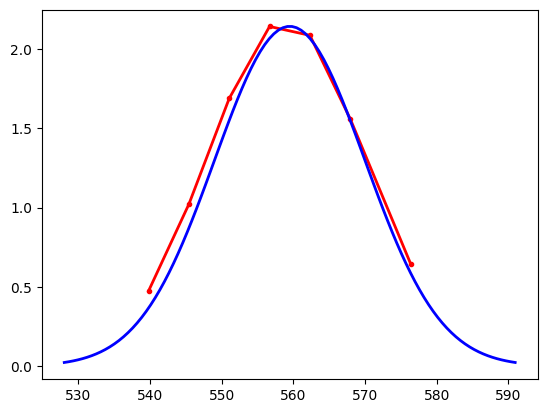

In [64]:
# Строим полигон и функцию нормального распределения:
fig, ax = plt.subplots()

ax.plot(df6["xi"], df6["n'i"] / df6["hi"], '.-r', linewidth=2.0)

# Расчитываем среднее значение минимального и максимального "x":
mean_x = (df6["x0"].min() + df6["x1"].max()) / 2

# Расчитываем координаты "x" для функции нормального распределения:
normal_x = np.linspace(-selective_std * 3, selective_std * 3, 100)

# Расчитываем координаты "y" для функции нормального распределения:
normal_y = stats.norm.pdf(normal_x, 0, selective_std)

# Сдвигаем функцию нормального распределения на "mean_x":
normal_x += mean_x

# Расчитываем коэффициент нормирования "k" для графика нормального
# распределения. Домножаем значения на расчитанный коэффициент:
k = (df6["n'i"].max() / df6["hi"][3]) / normal_y.max()
normal_y *= k

ax.plot(normal_x, normal_y, '-b', linewidth=2.0)

plt.show()

In [65]:
# У нормального закона мы оцениваем r = 2 параметра.

# Количество оцениваемых параметров рассматриваемого закона распределения:
count_params = 2

# Расчитаем консатнту k - количество степеней свобод:
k = count_intervals - count_params - 1

k

3

In [50]:
# Наш коэффициент Пирсона:
a_coeff

0.2

In [51]:
# Тогда теоретическое значение "Кси квадрат": Xkr = Xkr(1 - 0.2, 4):
Xkr = stats.chi2.ppf(1 - a_coeff, k)

Xkr

5.988616694004245

In [66]:
# Создадим новый датафрейм df6 состоящий из двух колонок ["ni", "n'i"]:
df7 = df6[["ni", "n'i"]]

# Добавим в df7 колонку "(ni - n'i)^2 / n'i":
df7 = df7.assign(i1 = lambda x: (x["ni"] - x["n'i"]) ** 2 / x["n'i"])

# Переименовываем колонку:
df7 = df7.rename(columns = {"i1" : "(ni - n'i)^2 / n'i"})

df7

,ni,n'i,(ni - n'i)^2 / n'i
0,5,2.671117,2.030498
1,5,5.748648,0.097497
2,8,9.497884,0.236227
3,13,12.047895,0.075242
4,14,11.733710,0.437719
5,5,8.774000,1.623328
6,10,7.256981,1.036816


In [67]:
# Найдём сумму по колонке "(ni - n'i)^2 / n'i" (Расчитанный критерий):
Xresult = df7["(ni - n'i)^2 / n'i"].sum()

Xresult

5.537326206459158

In [68]:
# Сравним критическое значение критерия Пирсона - Xkr и наблюдаемое значение Xresult

if (Xresult > Xkr):
    result = "ОТВЕРГАЕМ"
    symbol = ">"
    
    string_ans = 'На уровне значимости {0} гипотезу о нормальном распределении генеральной совокупности {1}.\
              \nВследствие того, что Xresult {2} Xkr:\n\n{3} {4} {5}\
              '.format(a_coeff, result, symbol, round(Xresult, 3), symbol, round(Xkr, 3))
    
else:
    result = "ПРИНИМАЕМ"
    symbol = "<="
    
    string_ans = 'На уровне значимости {0} гипотезу о нормальном распределении генеральной совокупности {1}.\
              \nВследствие того, что Xresult {2} Xkr:\n\n{3} {4} {5}\
              '.format(a_coeff, result, symbol, round(Xresult, 3), symbol, round(Xkr, 3))

print(string_ans)

На уровне значимости 0.2 гипотезу о нормальном распределении генеральной совокупности ПРИНИМАЕМ.              
Вследствие того, что Xresult <= Xkr:

5.537 <= 5.989              


In [69]:
# 
# 
# Пункт седьмой: Найти доверительный интервал для математического ожидания генеральной
# совокупности с надежностью "y".
# 
# 

In [70]:
# Наш коэффициент надёжности "y":
y_coeff

0.9

In [71]:
# 
# Первый способ (С помощью функции Лапласса):
# 

In [72]:
# Тогда найдём такой аргумент "t" от функции Лапласса, при котором
# Ф(t) = y_coeff / 2:
t = 1.65

t

1.65

In [73]:
# Проверим правильное ли значение "t" мы нашли:
stats.norm.cdf(t) - 0.5

0.4505285319663519

In [76]:
# Найдем нижнюю границу интервала доверия:
# mx_min = selective_mean - (selective_std * t) / (all_count ** 0.5)
mx_min = selective_mean - (s * t) / (all_count ** 0.5)

mx_min

556.6327081591415

In [77]:
# Найдем верхнюю границу интервала доверия:
# mx_max = selective_mean + (selective_std * t) / (all_count ** 0.5)
mx_max = selective_mean + (s * t) / (all_count ** 0.5)

mx_max

561.2422918408585

In [326]:
# 
# Второй способ (С помощью распределения Стъюдента):
# 

In [78]:
# Расчитываем минимальную границу мат. ожидания:
mx_min = selective_mean - (s * 1.2816) / (all_count ** 0.5)

mx_min

557.147305319246

In [79]:
# Расчитываем максимальную границу мат. ожидания:
mx_max = selective_mean + (s * 1.2816) / (all_count ** 0.5)

mx_max

560.727694680754

In [80]:
# Тогда доверительный интервал с точностью y будет записан следующим образом:

string_ans = f"Доверительный интервал для генеральной совокупности с надежностью y = {y_coeff}:\
              \n\n{round(mx_min, 2)} < M(x) < {round(mx_max, 2)}"

print(string_ans)

Доверительный интервал для генеральной совокупности с надежностью y = 0.9:              

557.15 < M(x) < 560.73
